# Lisa Huo's Final Project

The research question here is to see whether the relationship between covid vaccination rate and hospitalized number is being negative. The basic assumption here is that higher vaccination rate could lower the new cases every day and the hospitalized number also. I am planning to do the datasets focusing on New York State. 

I used one dataset that tracks the covid cases everyday from Hopkins Univeristy, and another datasets from Our World in Data website that tracks the daily hospitalized number. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mplib
import matplotlib.pyplot as plt 
import seaborn as sns    

In [3]:
%cd ~
%cd "downloads"

/Users/lisahuo
/Users/lisahuo/Downloads


Starting with the brief situation in the US

Loading the covid cases dataset.

In [4]:
covid_case = pd.read_csv("owid-covid-data.csv")

In [5]:
covid_case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97066,ZWE,Africa,Zimbabwe,2021-06-16,40556.0,238.0,160.571,1640.0,3.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97067,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97068,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97069,ZWE,Africa,Zimbabwe,2021-06-19,41628.0,293.0,253.714,1666.0,10.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


Filtering the location under United States

In [6]:
covid_us = covid_case[covid_case['location']=='United States']

In [7]:
covid_us

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
91997,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
91998,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
91999,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
92000,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
92001,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92508,USA,North America,United States,2021-06-16,33498468.0,12430.0,12673.571,600653.0,368.0,334.143,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
92509,USA,North America,United States,2021-06-17,33508867.0,10399.0,12081.571,600934.0,281.0,313.571,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
92510,USA,North America,United States,2021-06-18,33529475.0,20608.0,11496.429,601571.0,637.0,312.286,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
92511,USA,North America,United States,2021-06-19,33537995.0,8520.0,11538.143,601741.0,170.0,296.571,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


Remove the columns that I don't need

In [8]:
covid_us = covid_us[['location','date','total_cases','new_cases','total_deaths','new_deaths']]
covid_us

,location,date,total_cases,new_cases,total_deaths,new_deaths
91997,United States,2020-01-22,1.0,NaN,NaN,NaN
91998,United States,2020-01-23,1.0,0.0,NaN,NaN
91999,United States,2020-01-24,2.0,1.0,NaN,NaN
92000,United States,2020-01-25,2.0,0.0,NaN,NaN
92001,United States,2020-01-26,5.0,3.0,NaN,NaN
...,...,...,...,...,...,...
92508,United States,2021-06-16,33498468.0,12430.0,600653.0,368.0
92509,United States,2021-06-17,33508867.0,10399.0,600934.0,281.0
92510,United States,2021-06-18,33529475.0,20608.0,601571.0,637.0
92511,United States,2021-06-19,33537995.0,8520.0,601741.0,170.0


Since for the hospitalized data I goanna use later, it only has records for US starting from 7/15/2021, I filter this under the same date.

In [9]:
covid_us = covid_us[covid_us['date']>='2020-07-15']
covid_us

,location,date,total_cases,new_cases,total_deaths,new_deaths
92172,United States,2020-07-15,3506444.0,68090.0,138095.0,974.0
92173,United States,2020-07-16,3582310.0,75866.0,139050.0,955.0
92174,United States,2020-07-17,3654546.0,72236.0,139975.0,925.0
92175,United States,2020-07-18,3717082.0,62536.0,140834.0,859.0
92176,United States,2020-07-19,3777538.0,60456.0,141319.0,485.0
...,...,...,...,...,...,...
92508,United States,2021-06-16,33498468.0,12430.0,600653.0,368.0
92509,United States,2021-06-17,33508867.0,10399.0,600934.0,281.0
92510,United States,2021-06-18,33529475.0,20608.0,601571.0,637.0
92511,United States,2021-06-19,33537995.0,8520.0,601741.0,170.0


Graph for total cases along with the time

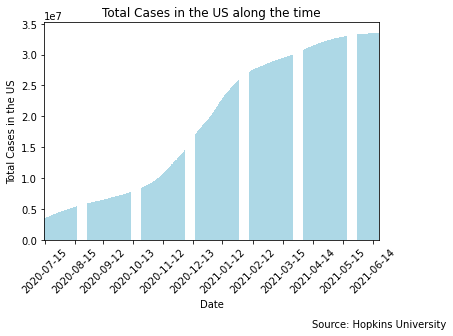

In [10]:
g = sns.barplot(x='date', y='total_cases', data=covid_us, facecolor = 'lightblue')
plt.xlabel('Date')
plt.ylabel('Total Cases in the US')
plt.annotate('Source: Hopkins University', xy=(0.8, -0.40), xycoords="axes fraction")
plt.title('Total Cases in the US along the time')
plt.xticks(rotation=45)
month = mplib.dates.MonthLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(month)

Graph for new cases along the time

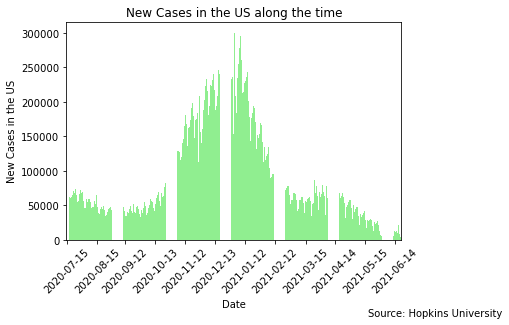

In [12]:
sns.barplot(x='date', y='new_cases', data=covid_us, facecolor = 'lightgreen')
plt.xlabel('Date')
plt.ylabel('New Cases in the US')
plt.annotate('Source: Hopkins University', xy=(0.9, -0.35), xycoords="axes fraction")
plt.title('New Cases in the US along the time')
plt.xticks(rotation=45)
month = mplib.dates.MonthLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(month)

Load the data for Hospitalized number

In [13]:
Hospitalized_number = pd.read_csv("current-covid-patients-hospital.csv")
Hospitalized_number

,Entity,Code,Day,Daily hospital occupancy
0,Austria,AUT,2020-04-01,856
1,Austria,AUT,2020-04-02,823
2,Austria,AUT,2020-04-03,829
3,Austria,AUT,2020-04-04,826
4,Austria,AUT,2020-04-05,712
...,...,...,...,...
12341,United States,USA,2021-06-22,12487
12342,United States,USA,2021-06-23,12603
12343,United States,USA,2021-06-24,12326
12344,United States,USA,2021-06-25,12337


Filter the data under US

In [14]:
Hospitalized_us = Hospitalized_number[Hospitalized_number['Entity']=='United States']
Hospitalized_us

,Entity,Code,Day,Daily hospital occupancy
11999,United States,USA,2020-07-15,33757
12000,United States,USA,2020-07-16,38549
12001,United States,USA,2020-07-17,40078
12002,United States,USA,2020-07-18,40409
12003,United States,USA,2020-07-19,37910
...,...,...,...,...
12341,United States,USA,2021-06-22,12487
12342,United States,USA,2021-06-23,12603
12343,United States,USA,2021-06-24,12326
12344,United States,USA,2021-06-25,12337


Graph for Hospitalized data

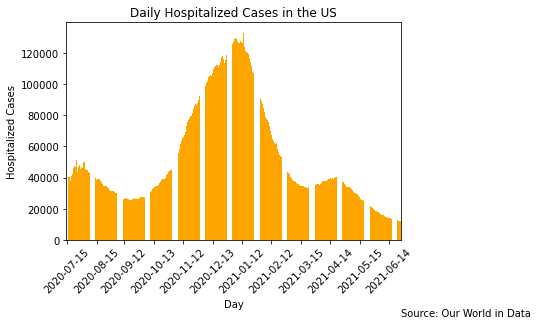

In [15]:
sns.barplot(x='Day', y='Daily hospital occupancy', data=Hospitalized_us, facecolor = 'orange')
plt.xlabel('Day')
plt.ylabel('Hospitalized Cases')
plt.annotate('Source: Our World in Data', xy=(1.0, -0.35), xycoords="axes fraction")
plt.title('Daily Hospitalized Cases in the US')
plt.xticks(rotation=45)
month = mplib.dates.MonthLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(month)

Based on the graph we can see, the highest daily cases and daily hospital occupancy were happening around the winter vacation. Until now, the daily new cases is become way more less than before, so now we want to check whether that is the effect from vaccination. I will start to mainly focus on New York.

Loading the coronavirus data specifically focus on New york

In [16]:
covid_ny = pd.read_csv("covid_confirmed_usafacts.csv")
covid_ny

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,7244,7247,7247,7257,7257,7262,7262,7262,7262,7262
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,21945,21985,21985,22027,22027,22043,22043,22043,22043,22043
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,2344,2345,2345,2346,2346,2347,2347,2347,2347,2347
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2686,2687,2687,2693,2693,2693,2693,2693,2693,2693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4729,4739,4757,4771,4780,4788,4788,4788,4788,4801
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,3801,3801,3801,3801,3801,3802,3802,3802,3802,3804
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,2315,2318,2319,2320,2320,2321,2321,2321,2321,2325
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,926,926,926,926,926,927,927,927,927,927


In [17]:
covid_ny = covid_ny[covid_ny['State']=='NY']
covid_ny

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06
1860,0,Statewide Unallocated,NY,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1861,36001,Albany County,NY,36,0,0,0,0,0,0,...,24729,24733,24733,24734,24735,24736,24737,24739,24739,24740
1862,36003,Allegany County,NY,36,0,0,0,0,0,0,...,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562
1863,36005,Bronx County,NY,36,0,0,0,0,0,0,...,177046,177065,177088,177124,177152,177194,177222,177251,177279,177293
1864,36007,Broome County,NY,36,0,0,0,0,0,0,...,18650,18652,18652,18655,18656,18659,18659,18660,18669,18669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,36115,Washington County,NY,36,0,0,0,0,0,0,...,3166,3166,3166,3167,3167,3167,3167,3167,3167,3169
1919,36117,Wayne County,NY,36,0,0,0,0,0,0,...,5794,5794,5794,5796,5796,5797,5797,5798,5800,5800
1920,36119,Westchester County,NY,36,0,0,0,0,0,0,...,129830,129835,129849,129866,129888,129903,129912,129927,129938,129947
1921,36121,Wyoming County,NY,36,0,0,0,0,0,0,...,3585,3585,3588,3588,3589,3589,3593,3594,3596,3597


In [18]:
covid_ny_T = covid_ny.set_index('County Name')

In [19]:
covid_ny_T = covid_ny_T.drop(['countyFIPS', 'State', 'StateFIPS'], axis=1)

In [20]:
covid_ny_T = covid_ny_T.T

<AxesSubplot:>

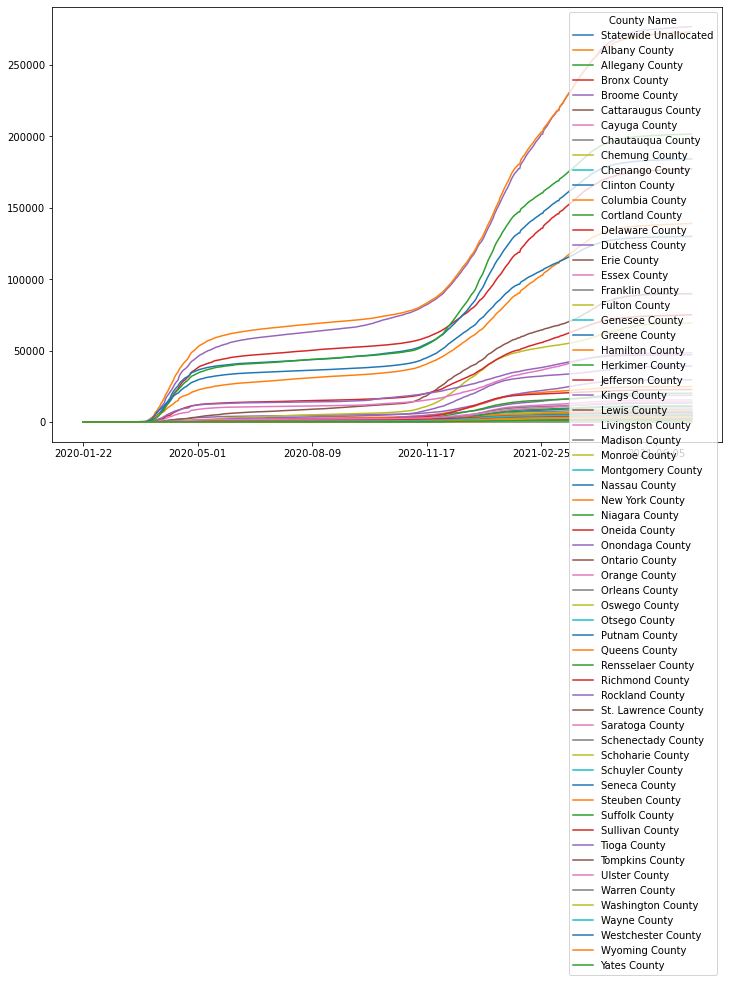

In [21]:
covid_ny_T.plot(kind='line',
    figsize=(12,8))

Using the population number as the denominator so that we can know how many percentage of people have been tested positive.

In [22]:
population_by_county = pd.read_csv("new york population by county.csv")
population_by_county['Covid 2021/07/16']/population_by_county['Population']

0     0.080595
1     0.076294
2     0.123543
3     0.096636
4     0.074273
        ...   
57    0.051431
58    0.064075
59    0.134119
60    0.089245
61    0.047179
Length: 62, dtype: float64

In [23]:
population_by_county['Covid cases percentage'] = population_by_county['Covid 2021/07/16']/population_by_county['Population']

In [24]:
population_by_county

,Index,County,Population,Covid 2021/07/16,Covid cases percentage
0,1,Albany County,306968,24740,0.080595
1,2,Allegany County,46688,3562,0.076294
2,3,Bronx County,1435068,177293,0.123543
3,4,Broome County,193188,18669,0.096636
4,5,Cattaraugus County,77121,5728,0.074273
...,...,...,...,...,...
57,58,Washington County,61616,3169,0.051431
58,59,Wayne County,90519,5800,0.064075
59,60,Westchester County,968890,129947,0.134119
60,61,Wyoming County,40305,3597,0.089245


<AxesSubplot:xlabel='County', ylabel='Covid cases percentage'>

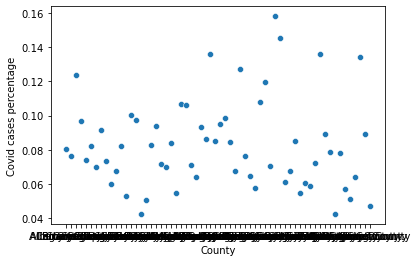

In [25]:
sns.scatterplot(
    x='County',
    y='Covid cases percentage',
    data=population_by_county, 
)

We can see there are several outliers at the very top, the top two are richmond county and rockland county.

Using the diff command to get the daily changes based on county.

In [26]:
covid_ny_d = covid_ny_T.diff()
covid_ny_d

County Name,Statewide Unallocated,Albany County,Allegany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Chenango County,...,Sullivan County,Tioga County,Tompkins County,Ulster County,Warren County,Washington County,Wayne County,Westchester County,Wyoming County,Yates County
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,0.0,1.0,0.0,42.0,3.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,3.0,2.0,0.0,1.0,15.0,0.0,0.0
2021-07-03,0.0,1.0,0.0,28.0,0.0,1.0,1.0,1.0,0.0,0.0,...,3.0,0.0,1.0,0.0,3.0,0.0,0.0,9.0,4.0,0.0
2021-07-04,0.0,2.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,0.0,1.0,0.0,0.0,1.0,15.0,1.0,0.0
2021-07-05,0.0,0.0,0.0,28.0,9.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,3.0,3.0,0.0,0.0,2.0,11.0,2.0,0.0


Filter the date between 2020/12/14 to 2021/06/30, because I am going to merge this dataset with the vaccination one, the vaccination one is under this range.

In [27]:
covid_ny_d = covid_ny_d[covid_ny_d.index>='2020-12-14']
covid_ny_d = covid_ny_d[covid_ny_d.index<='2021-06-30']

Adding another column to calculate the daily cases in New York.

In [28]:
covid_ny_d['Daily Cases'] = covid_ny_d.sum(axis=1) 
covid_ny_d

County Name,Statewide Unallocated,Albany County,Allegany County,Bronx County,Broome County,Cattaraugus County,Cayuga County,Chautauqua County,Chemung County,Chenango County,...,Tioga County,Tompkins County,Ulster County,Warren County,Washington County,Wayne County,Westchester County,Wyoming County,Yates County,Daily Cases
2020-12-14,0.0,162.0,8.0,475.0,72.0,21.0,37.0,42.0,33.0,12.0,...,12.0,37.0,66.0,2.0,13.0,47.0,594.0,12.0,10.0,9044.0
2020-12-15,0.0,164.0,24.0,671.0,69.0,34.0,48.0,58.0,27.0,12.0,...,10.0,20.0,92.0,8.0,10.0,34.0,560.0,19.0,3.0,10353.0
2020-12-16,0.0,191.0,24.0,601.0,91.0,51.0,68.0,35.0,45.0,25.0,...,18.0,24.0,62.0,11.0,9.0,47.0,549.0,25.0,3.0,9998.0
2020-12-17,0.0,208.0,17.0,675.0,72.0,37.0,101.0,38.0,70.0,11.0,...,14.0,34.0,67.0,29.0,13.0,58.0,571.0,35.0,8.0,10914.0
2020-12-18,0.0,208.0,34.0,720.0,129.0,71.0,86.0,128.0,73.0,17.0,...,18.0,39.0,122.0,8.0,6.0,33.0,716.0,39.0,9.0,12697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,0.0,2.0,0.0,36.0,1.0,0.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,385.0
2021-06-27,0.0,1.0,1.0,21.0,2.0,0.0,2.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,16.0,0.0,0.0,346.0
2021-06-28,0.0,4.0,0.0,19.0,2.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,290.0
2021-06-29,0.0,0.0,0.0,23.0,0.0,0.0,2.0,0.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,14.0,3.0,0.0,275.0


<AxesSubplot:>

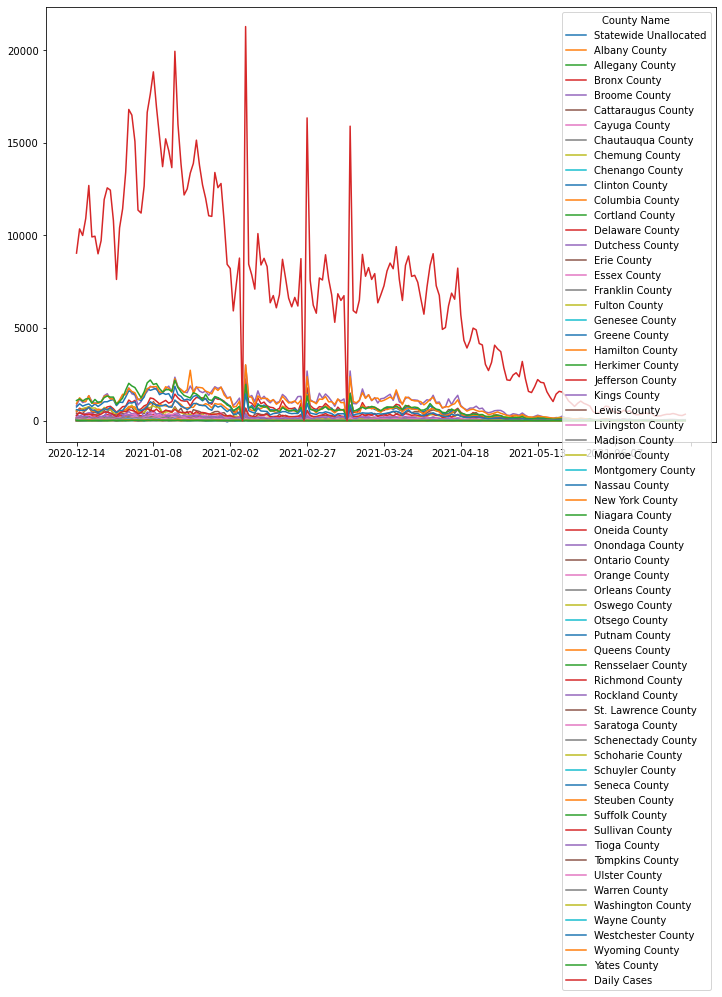

In [29]:
covid_ny_d.plot(kind='line',
    figsize=(12,8))

Loading the vaccination data and starting to focus on New York State

In [30]:
newyork_vacci = pd.read_csv('https://raw.githubusercontent.com/nychealth/covid-vaccine-data/main/people/coverage-by-modzcta-allages.csv')

In [31]:
newyork_vacci

,DATE,NEIGHBORHOOD_NAME,BOROUGH,MODZCTA,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS
0,2021-07-21,Chelsea/NoMad/West Chelsea,Manhattan,10001,"10001, 10118",All ages,27613.09,3238,25102,28340,11.73,90.91,102.63
1,2021-07-21,Chinatown/Lower East Side,Manhattan,10002,10002,All ages,75322.71,3885,53221,57106,5.16,70.66,75.82
2,2021-07-21,East Village/Gramercy/Greenwich Village,Manhattan,10003,10003,All ages,53977.81,2238,36098,38336,4.15,66.88,71.02
3,2021-07-21,Financial District,Manhattan,10004,10004,All ages,2972.12,299,3258,3557,10.06,109.62,119.68
4,2021-07-21,Financial District,Manhattan,10005,10005,All ages,8757.23,541,6960,7501,6.18,79.48,85.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2021-07-21,Edgemere/Far Rockaway,Queens,11691,11691,All ages,66856.31,2646,22102,24748,3.96,33.06,37.02
173,2021-07-21,Arverne/Edgemere,Queens,11692,11692,All ages,21029.13,823,7728,8551,3.91,36.75,40.66
174,2021-07-21,Arverne/Broad Channel,Queens,11693,11693,All ages,12672.14,378,5148,5526,2.98,40.62,43.61
175,2021-07-21,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,11694,All ages,20779.40,718,9999,10717,3.46,48.12,51.58


In [32]:
Vacci_by_day = pd.read_csv('https://raw.githubusercontent.com/nychealth/covid-vaccine-data/main/doses/doses-by-day.csv')

In [33]:
Vacci_by_day

,DATE,ADMIN_DOSE1_DAILY,ADMIN_DOSE1_CUMULATIVE,ADMIN_DOSE2_DAILY,ADMIN_DOSE2_CUMULATIVE,ADMIN_SINGLE_DAILY,ADMIN_SINGLE_CUMULATIVE,ADMIN_ALLDOSES_DAILY,ADMIN_ALLDOSES_7DAYAVG,ADMIN_ALLDOSES_CUMULATIVE,INCOMPLETE
0,2020-12-14,78,78,0,0,0,0,78,NaN,78,0
1,2020-12-15,2041,2119,2,2,3,3,2046,NaN,2124,0
2,2020-12-16,4518,6637,10,12,1,4,4529,NaN,6653,0
3,2020-12-17,4507,11144,11,23,0,4,4518,NaN,11171,0
4,2020-12-18,5781,16925,22,45,2,6,5805,NaN,16976,0
...,...,...,...,...,...,...,...,...,...,...,...
215,2021-07-17,6606,4917253,7049,4402642,756,424527,14411,16636.43,9744422,120000
216,2021-07-18,4158,4921411,4108,4406750,558,425085,8824,16567.57,9753246,120000
217,2021-07-19,8548,4929959,7852,4414602,917,426002,17317,16603.57,9770563,120000
218,2021-07-20,9600,4939559,7726,4422328,896,426898,18222,16439.57,9788785,120000


In [34]:
Vacci_by_day = Vacci_by_day[Vacci_by_day.DATE<='2021-06-30']

In [35]:
covid_ny_d['Daily Vaccination'] = Vacci_by_day['ADMIN_DOSE1_DAILY'].values
Cases_vs_Vacci = covid_ny_d[['Daily Cases','Daily Vaccination']]
Cases_vs_Vacci

County Name,Daily Cases,Daily Vaccination
2020-12-14,9044.0,78
2020-12-15,10353.0,2041
2020-12-16,9998.0,4518
2020-12-17,10914.0,4507
2020-12-18,12697.0,5781
...,...,...
2021-06-26,385.0,7805
2021-06-27,346.0,5045
2021-06-28,290.0,8999
2021-06-29,275.0,9749


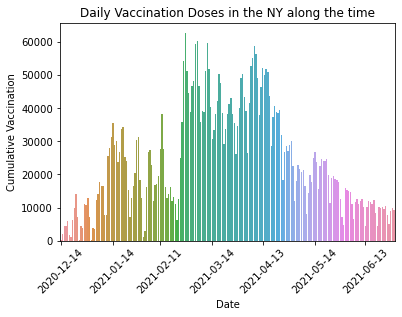

In [36]:
g = sns.barplot(x='DATE', y='ADMIN_DOSE1_DAILY', data=Vacci_by_day)
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccination')
plt.title('Daily Vaccination Doses in the NY along the time')
plt.xticks(rotation=45)
month = mplib.dates.MonthLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(month)

Text(0.5, 1.0, 'New York Daily Covid Cases and Vaccination Doses')

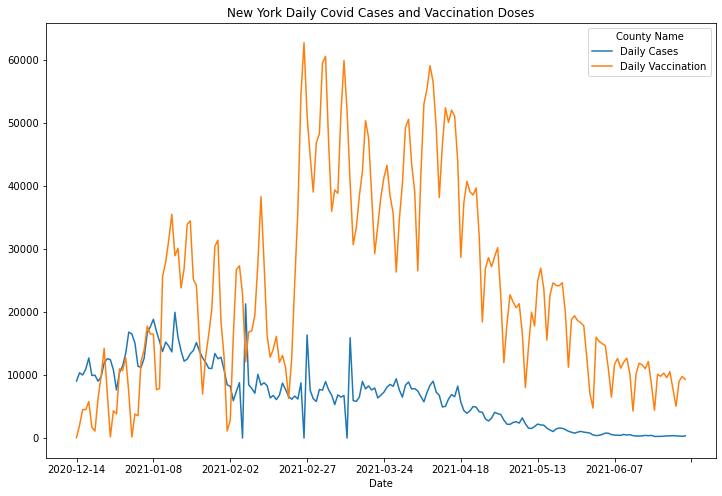

In [37]:
Cases_vs_Vacci.plot(kind='line',
    figsize=(12,8))
plt.xlabel('Date')
plt.title('New York Daily Covid Cases and Vaccination Doses')

We can see although there are some fluctuation at the beginning, when the vaccination rate increases, there is a decrease in daily cases and eventually the daily cases remain stable.

--Lisa Huo